In [1]:
from neko.core.network import Network
from neko._visual.visualize_network import NetworkVisualizer
from neko._inputs.resources import Resources
from neko._annotations.gene_ontology import Ontology
import omnipath as op
import pandas as pd

First set the folder for input and output

In [2]:
data_folder = "../../../data/"

figures_folder = "../../Figures/SHH/"

sif_output = "../../sif_files/SHH/"

Selecting as resources just Signor

In [3]:
resources = Resources()

In [4]:
resources.import_signor_tsv(data_folder + "signor_db.tsv")

In [5]:
df = resources.interactions

In [6]:
# Remove rows where 'source' or 'target' starts with "CHEBI"
filtered_df = df[~(df['source'].str.startswith('CHEBI') | df['target'].str.startswith('CHEBI'))]

Loading the data from Antoine

In [7]:
data = pd.read_csv(data_folder + "gene_per_subgroup_correlation_sorted_melt.csv")

In [8]:
# Sorting the plot_df by correlation in descending order and selecting the top N genes per group
top_n = 50  # Set the desired number of genes to display per group

top_genes_per_group = data.groupby('Group').apply(lambda x: x.nlargest(top_n, 'Correlation')).reset_index(drop=True)

top_genes_per_group

/tmp/ipykernel_24675/189381725.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_genes_per_group = data.groupby('Group').apply(lambda x: x.nlargest(top_n, 'Correlation')).reset_index(drop=True)


,Gene,Group,Correlation
0,ZFPM2,Group3,0.957692
1,FOXG1,Group3,0.947957
2,FSTL5,Group3,0.942308
3,PAPPA2,Group3,0.941538
4,IMPG2,Group3,0.941538
...,...,...,...
195,LRRC55,WNT,0.876923
196,SYT1,WNT,0.875385
197,SYT2,WNT,0.874615
198,PLXDC1,WNT,0.872308


In [9]:
shh_list = top_genes_per_group[top_genes_per_group["Group"] == "SHH"]["Gene"].reset_index(drop=True).to_list()

Selecting just SHH group

In [10]:
shh_list

['PLCH1',
 'MYCL',
 'DMRTA1',
 'SATB2',
 'CAMK2N1',
 'TCERG1L',
 'DRD2',
 'ADCYAP1',
 'PDE10A',
 'RBP1',
 'SH3GL2',
 'PTPRK',
 'LRRC16A',
 'EVC2',
 'KCTD17',
 'POU3F3',
 'PTX3',
 'PLXNC1',
 'GREB1L',
 'NTRK3',
 'PDPN',
 'SPHKAP',
 'POU3F2',
 'ADAM23',
 'DSCAM',
 'SEMA6A',
 'SBSPON',
 'BARHL2',
 'MRAP2',
 'DCDC1',
 'NLGN1',
 'EVC',
 'TOX3',
 'MFNG',
 'PAX6',
 'ALDH1A3',
 'FGF14',
 'KIAA1549L',
 'NLGN4X',
 'NKAIN1',
 'VRK2',
 'ROBO1',
 'TOM1L1',
 'TMEM98',
 'SYT1',
 'NTN4',
 'ELAVL4',
 'L3MBTL4',
 'UNC5C',
 'KCNJ6']

# Creating a Network starting from All Omnipath interactions

In [11]:
shh_net = Network(shh_list, resources = filtered_df)

Error: node PLCH1 is not present in the resources database
Error: node DMRTA1 is not present in the resources database
Error: node CAMK2N1 is not present in the resources database
Error: node TCERG1L is not present in the resources database
Error: node RBP1 is not present in the resources database
Error: node LRRC16A is not present in the resources database
Error: node EVC2 is not present in the resources database
Error: node GREB1L is not present in the resources database
Error: node PDPN is not present in the resources database
Error: node SPHKAP is not present in the resources database
Error: node ADAM23 is not present in the resources database
Error: node SEMA6A is not present in the resources database
Error: node SBSPON is not present in the resources database
Error: node BARHL2 is not present in the resources database
Error: node DCDC1 is not present in the resources database
Error: node EVC is not present in the resources database
Error: node TOX3 is not present in the resources

Adding the node that were not found manually: HOXDB13 --> HOXD13, HOXDB --> HOXD9, Q8N9L1 --> ZIC4

In [12]:
shh_net.nodes

,Genesymbol,Uniprot,Type
0,MYCL,P12524,NaN
1,SATB2,Q9UPW6,NaN
2,DRD2,P14416,NaN
3,ADCYAP1,P18509,NaN
4,PDE10A,Q9Y233,NaN
5,SH3GL2,Q99962,NaN
6,PTPRK,Q15262,NaN
7,KCTD17,Q8N5Z5,NaN
8,POU3F3,P20264,NaN
9,PTX3,P26022,NaN


In [13]:
shh_net.complete_connection(maxlen=4, algorithm='dfs', only_signed=True, connect_with_bias=False, consensus=False)

In [14]:
shh_net.nodes

,Genesymbol,Uniprot,Type
0,MYCL,P12524,NaN
1,SATB2,Q9UPW6,NaN
2,DRD2,P14416,NaN
3,ADCYAP1,P18509,NaN
4,PDE10A,Q9Y233,NaN
...,...,...,...
66,DCC,P43146,NaN
67,PTK2,Q05397,NaN
68,NANOG,Q9H9S0,NaN
69,NFATC2,Q13469,NaN


In [15]:
shh_net.edges

,source,target,Type,Effect,References
0,P14416,P09471,None,stimulation,31160049; 31160049
1,P09471,Q99608,None,stimulation,25012566; 25012566
2,Q99608,O75925,None,inhibition,24911587; 24911587
3,O75925,Q9UPW6,None,inhibition,14701874; 14701874
4,Q16288,P29353,None,stimulation,10092678; 10092678
...,...,...,...,...,...
133,P68400,P05412,None,inhibition,1516134
134,Q05397,P62993,None,stimulation,15688067
135,O14543,P40763,None,inhibition,24600449; 21628332
136,P40763,P01106,None,stimulation,21408055


In [16]:
df_gs = shh_net.convert_edgelist_into_genesymbol()

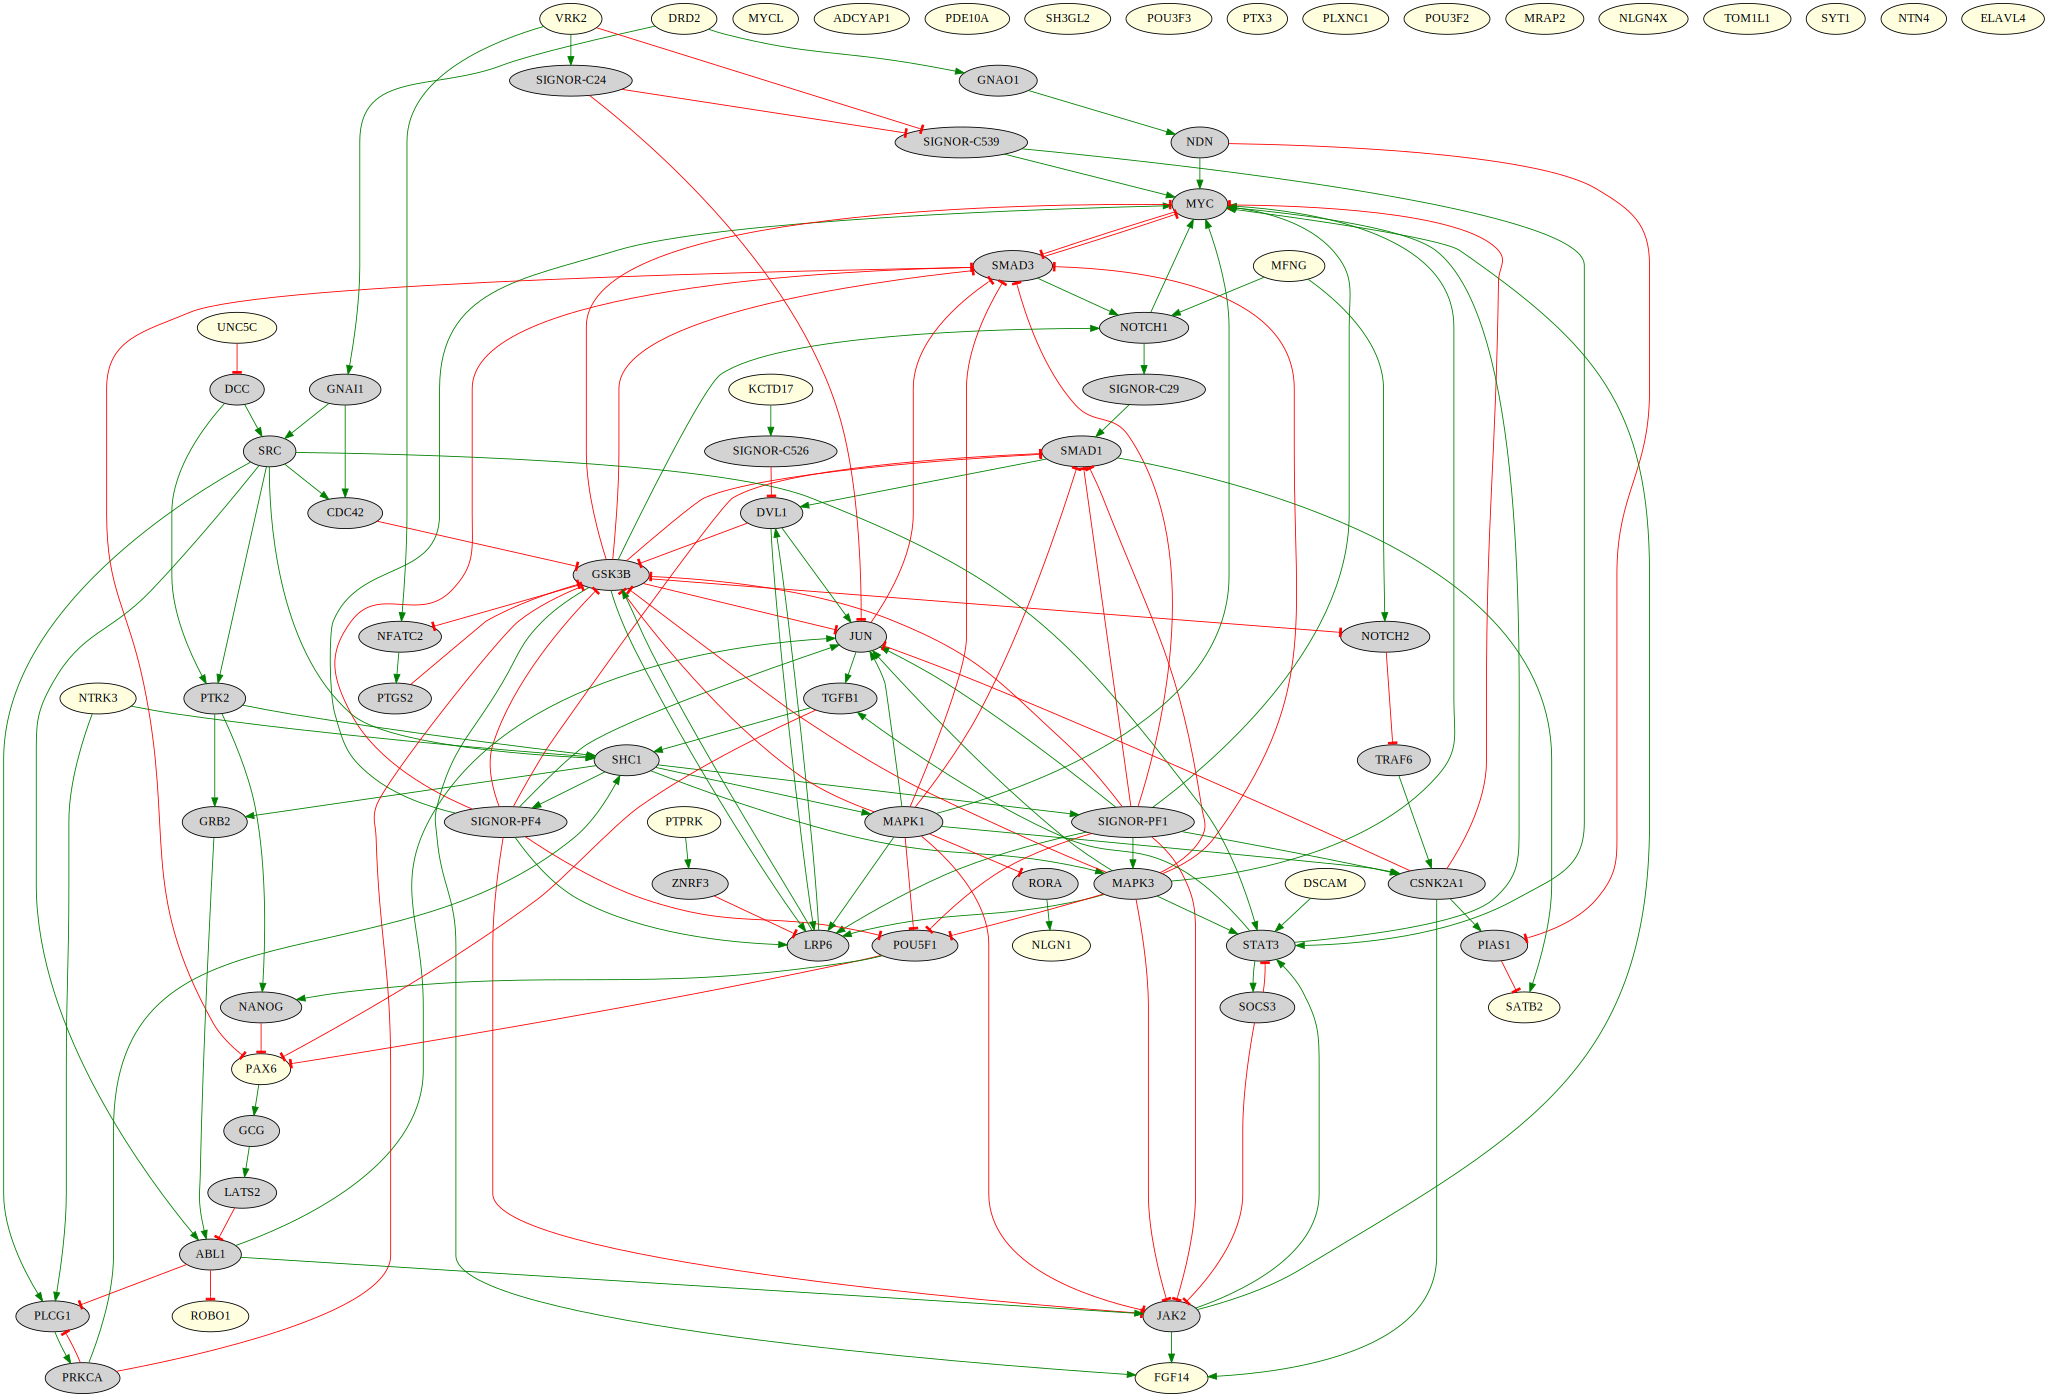

In [17]:
shh_visualizer = NetworkVisualizer(shh_net,color_by='effect', noi=True)
output = figures_folder + "SHH_signor_Lin"
shh_visualizer.render(output_file=output)

# Exporting Network in sif file

In [18]:
from neko._outputs.exports import Exports

In [19]:
for node in shh_net.nodes["Uniprot"]:
    if node not in shh_net.edges["source"].values and node not in shh_net.edges["target"].values:
        node = shh_net.nodes[ shh_net.nodes["Uniprot"] == node]["Genesymbol"].values
        print( node)
        shh_net.remove_node(node[0])

['MYCL']
['ADCYAP1']
['PDE10A']
['SH3GL2']
['POU3F3']
['PTX3']
['PLXNC1']
['POU3F2']
['MRAP2']
['NLGN4X']
['TOM1L1']
['SYT1']
['NTN4']
['ELAVL4']


In [20]:
export = Exports(shh_net)

In [21]:
export.export_sif(sif_output + "SHH_signor.sif")